## Project Name:

**Group 15: Alice Le, Jitao Zhang, Lincoln Lee, Yitong Gong**

In [36]:
# All needed libraries:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)

# General Graphs' setting:
options(repr.plot.width = 10, repr.plot.height = 6)

#### __Preliminary Results__

In [37]:
original_dataset <- read_csv("https://raw.githubusercontent.com/Jitao-Z/dataset/main/nces330_20.csv")
head(original_dataset)

Rows: 3548 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): State, Type, Length, Expense
dbl (2): Year, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,State,Type,Length,Expense,Value
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2013,Alabama,Private,4-year,Fees/Tuition,13983
2013,Alabama,Private,4-year,Room/Board,8503
2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
2013,Alabama,Public In-State,4-year,Room/Board,8473
2013,Alabama,Public Out-of-State,2-year,Fees/Tuition,7736


__Cleaning the data__

In [40]:
set.seed(2356)

# filters out all the irrelevant columns
tuition <- original_dataset |>
    filter(!is.na(Value),
           Expense == "Fees/Tuition",
           Year == 2020)


# calculates the mean tuition fee for each state in 2020
# mean_tuition_fee represents the average tuition fee for each state in 2020
tuition <- tuition |>
    group_by(State) |>
    summarize(mean_tuition_fees = mean(Value))


# adds the third column of political leaning
# note that we are using the party affiliation of each state in the 2020 presidential election 
# to represent their political leanings 
# deom stands for democrat; repub stands for republican
tuition <- tuition |>
    mutate(political_leaning = ifelse(grepl("Arizona|California|Colorado|Connecticut|Delaware|Georgia|Hawaii
                                                |Illinois|Maine|Maryland|Massachusetts|Michigan|Minnesota
                                                |Nevada|New Hampshire|New Jersey|New Mexico|New York|Oregon
                                                |Pennsylvania|Rhode Island|Vermont|Virginia|Washington|Wisconsin", State), 
                                            "demo", "repub"))

head(tuition)
nrow(tuition |> filter(political_leaning == "demo"))
nrow(tuition |> filter(political_leaning == "repub"))

State,mean_tuition_fees,political_leaning
<chr>,<dbl>,<chr>
Alabama,13628.80,repub
Alaska,18248.67,repub
Arizona,12235.40,demo
Arkansas,12422.00,repub
California,17368.40,demo
Colorado,14833.20,demo


[1] 23

[1] 28

__Visualization of the initial data__

In this section, we will be drawing two boxplots side-by-side to reflect the average tuition fees of democrat states and republican states in 2020. By oberserving through the following boxplots, we could expect to have an initial sense of how their tuition fee varies.

Note that even though the boxplot **will not** reflect the mean of our interested parameter, which is "mean_tuition_fee" here, it could still give us some insights into what our dataset looks like and facilitate us to make some first guesses of the difference of mean tuition fees between democrat states and republican states.

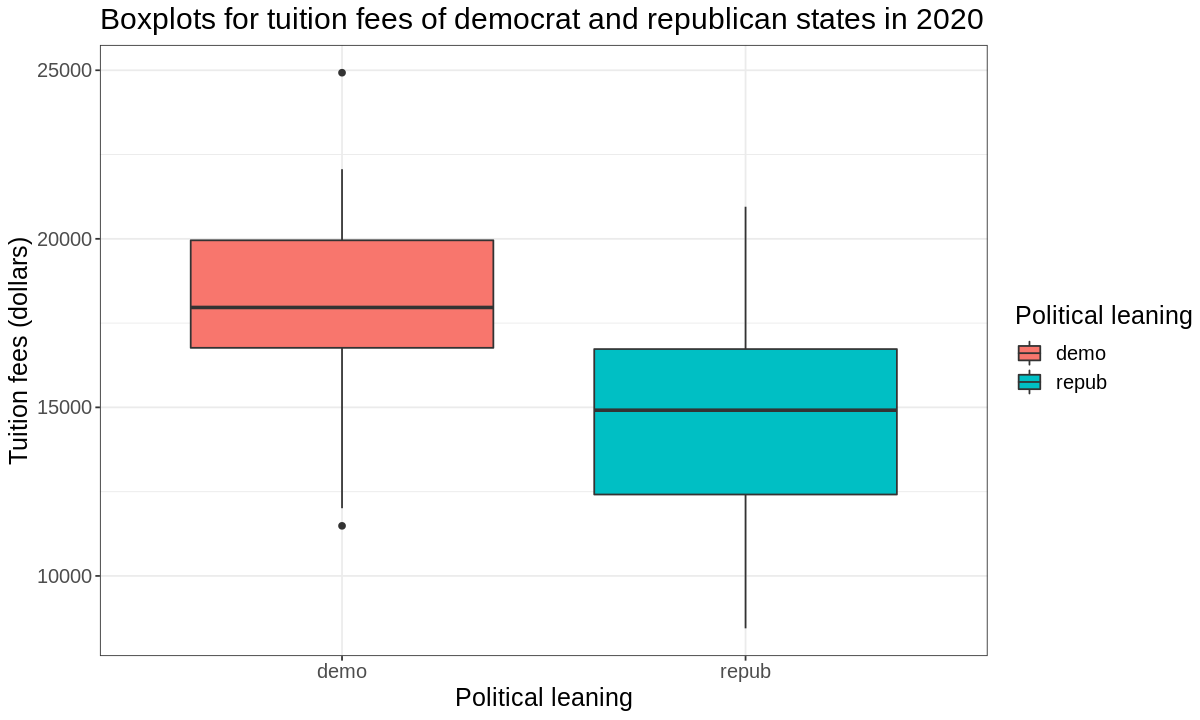

In [39]:
tuition_boxplots <- tuition |>
    ggplot(mapping = aes(x = political_leaning, y = mean_tuition_fees, fill = political_leaning)) +
    geom_boxplot() +
    ggtitle("Boxplots for tuition fees of democrat and republican states in 2020") +
    labs(x = "Political leaning", y = "Tuition fees (dollars)", fill = "Political leaning") +
    theme_bw() +
    theme(text = element_text(size = 15))

tuition_boxplots

__Computation of estimate of the parameter__

- $\mu_1$: population mean of tuition fees of democrat states in 2020
- $\mu_2$: population mean of tuition fees of republican states in 2020

- $\bar{x_1}$: sample mean of tuition fees of democrat states in 2020
- $\bar{x_2}$: sample mean of tuition fees of republican states in 2020

We would use $\bar{x_1} - \bar{x_2}$ as our estimate to approximate $\mu_1 - \mu_2$, which is our interested parameter.